# Сокращение оттока в компании «Работа с заботой»

# Цели проекта:
1. разработать решение, которое позволит предсказать уровень удовлетворённости сотрудника; 
2. построить модель прогноза оттока сотрудника.

<b>Этапы выполнения:</b> 

+ <b>Предсказание уровня удовлетворенности</b> 
1. Загрузка данных, анализ общей информации;
2. Предобработка данных: 
* преобразование типов данных;
* удаление и замена дубликатов.
3. Исследовательский анализ данных - описание и визуализация общей информации:
* статистический анализ всех признаков;
* построение графиков для каждого признака.
4. Подготовка данных.
5. Обучение и выбор модели:
* построение пайплайна;
* обучение двух моделей;
* выбор лучшей модели.
6. Формирование итогового вывода. 

+ <b>Прогноз оттока сотрудника</b> 
1. Загрузка данных, анализ общей информации;
2. Предобработка данных: 
* преобразование типов данных;
* удаление и замена дубликатов.
3. Исследовательский анализ данных - описание и визуализация общей информации:
* статистический анализ всех признаков;
* построение графиков для каждого признака.
4. Добавление входного признака.
5. Подготовка данных
6. Обучение и выбор модели:
* построение пайплайна;
* обучение двух моделей;
* выбор лучшей модели.
6. Формирование итогового вывода.

+ <b>Общий вывод</b> 

<b>Описание данных:</b> 
1.	Файл market_file.csv содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
Описание данных: 
*	id — уникальный идентификатор сотрудника;
*	dept — отдел, в котором работает сотрудник;
*	level — уровень занимаемой должности;
*	workload — уровень загруженности сотрудника;
*	employment_years — длительность работы в компании (в годах);
*	last_year_promo — показывает, было ли повышение за последний год;
*	last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;
*	supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;
*	salary — ежемесячная зарплата сотрудника;
*	job_satisfaction_rate — уровень удовлетворённости сотрудника работой в компании, целевой признак.

Данные:

<b>Задача 1</b> 

Тренировочная выборка:
train_job_satisfaction_rate.csv
Входные признаки тестовой выборки:
test_features.csv
Целевой признак тестовой выборки:
test_target_job_satisfaction_rate.csv

<b>Задача 2</b> 

Тренировочная выборка:
train_quit.csv
Входные признаки тестовой выборки те же, что и в прошлой задаче:
test_features.csv
Целевой признак тестовой выборки:
test_target_quit.csv


## Уровень удовлетворённости сотрудника

### Загрузка данных

In [1]:
#импорт библиотек и настройка отображения 
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.tree import DecisionTreeRegressor

from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer

from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer

from sklearn import svm
from sklearn.svm import SVC 

from sklearn.model_selection import GridSearchCV 
!pip install optuna -q
from optuna.integration import OptunaSearchCV
from optuna import distributions
from sklearn.dummy import DummyRegressor

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler

!pip install  phik==0.10.0 -q
import phik

!pip install shap -q
import shap

!pip install -U scikit-learn -q

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:.2f}'.format

RANDOM_STATE = 73
TEST_SIZE = 0.25

In [2]:
train_job_sr = pd.read_csv('https://code.s3.yandex.net/datasets/train_job_satisfaction_rate.csv')
test_features = pd.read_csv('https://code.s3.yandex.net/datasets/test_features.csv')
test_target_job_sr = pd.read_csv('https://code.s3.yandex.net/datasets/test_target_job_satisfaction_rate.csv')

In [3]:
#функция для расчета количесства строк в столбце, количество заполненных и доли пропусков
def df_info(df, str1 = "-------\n", str2 = "\n\n") :
    print(str1)
    df_size = df.size
    not_na_count = df.notna().sum()
    na_count = df.isna().sum()
    dublicated = df.duplicated().sum()
    
    if df_size == na_count:
        print('Данные отсутствуют')
    elif df_size == 0 :
        print('Данные отсутствуют')
    else:
        print(f"size: {df_size}")
        print(f"na_count: {na_count}")
        print(f"not_na_count: {not_na_count}")
        print(f"na_ratio: {(na_count / df_size):.2f}") 
        print(f"duplicated: {dublicated}") 
        print(f"duplicated_ratio: {(dublicated / df_size):.2f}") 
    print(str2)

In [4]:
#создаем функцию для применения предыдущей функции к каждому столбцу 
def data_info (data, col_name):
    print(col_name)
    df_info(data[col_name])

In [5]:
#смотрим результат для train_job_sr
for el in train_job_sr.columns:
    data_info(train_job_sr, el)
print(train_job_sr.info())
print('Дублей: ', train_job_sr.duplicated().sum())
print(train_job_sr.isna().sum())

id
-------

size: 4000
na_count: 0
not_na_count: 4000
na_ratio: 0.00
duplicated: 0
duplicated_ratio: 0.00



dept
-------

size: 4000
na_count: 6
not_na_count: 3994
na_ratio: 0.00
duplicated: 3994
duplicated_ratio: 1.00



level
-------

size: 4000
na_count: 4
not_na_count: 3996
na_ratio: 0.00
duplicated: 3996
duplicated_ratio: 1.00



workload
-------

size: 4000
na_count: 0
not_na_count: 4000
na_ratio: 0.00
duplicated: 3997
duplicated_ratio: 1.00



employment_years
-------

size: 4000
na_count: 0
not_na_count: 4000
na_ratio: 0.00
duplicated: 3990
duplicated_ratio: 1.00



last_year_promo
-------

size: 4000
na_count: 0
not_na_count: 4000
na_ratio: 0.00
duplicated: 3998
duplicated_ratio: 1.00



last_year_violations
-------

size: 4000
na_count: 0
not_na_count: 4000
na_ratio: 0.00
duplicated: 3998
duplicated_ratio: 1.00



supervisor_evaluation
-------

size: 4000
na_count: 0
not_na_count: 4000
na_ratio: 0.00
duplicated: 3995
duplicated_ratio: 1.00



salary
-------

size: 4000
na_co

In [6]:
#смотрим результат для test_features
for el in test_features.columns:
    data_info(test_features, el)
print(test_features.info())
print('Дублей: ', test_features.duplicated().sum())
print(test_features.isna().sum())

id
-------

size: 2000
na_count: 0
not_na_count: 2000
na_ratio: 0.00
duplicated: 0
duplicated_ratio: 0.00



dept
-------

size: 2000
na_count: 2
not_na_count: 1998
na_ratio: 0.00
duplicated: 1993
duplicated_ratio: 1.00



level
-------

size: 2000
na_count: 1
not_na_count: 1999
na_ratio: 0.00
duplicated: 1996
duplicated_ratio: 1.00



workload
-------

size: 2000
na_count: 0
not_na_count: 2000
na_ratio: 0.00
duplicated: 1996
duplicated_ratio: 1.00



employment_years
-------

size: 2000
na_count: 0
not_na_count: 2000
na_ratio: 0.00
duplicated: 1990
duplicated_ratio: 0.99



last_year_promo
-------

size: 2000
na_count: 0
not_na_count: 2000
na_ratio: 0.00
duplicated: 1998
duplicated_ratio: 1.00



last_year_violations
-------

size: 2000
na_count: 0
not_na_count: 2000
na_ratio: 0.00
duplicated: 1998
duplicated_ratio: 1.00



supervisor_evaluation
-------

size: 2000
na_count: 0
not_na_count: 2000
na_ratio: 0.00
duplicated: 1995
duplicated_ratio: 1.00



salary
-------

size: 2000
na_co

In [7]:
#смотрим результат для test_target_job_sr
for el in test_target_job_sr.columns:
    data_info(test_target_job_sr, el)
print(test_target_job_sr.info())
print('Дублей: ', test_target_job_sr.duplicated().sum())
print(test_target_job_sr.isna().sum())

id
-------

size: 2000
na_count: 0
not_na_count: 2000
na_ratio: 0.00
duplicated: 0
duplicated_ratio: 0.00



job_satisfaction_rate
-------

size: 2000
na_count: 0
not_na_count: 2000
na_ratio: 0.00
duplicated: 1902
duplicated_ratio: 0.95



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB
None
Дублей:  0
id                       0
job_satisfaction_rate    0
dtype: int64


Вывод: данные загружены. В отделе и уровне сотрудников есть пропуски как в тренировочной, так и в тестовой выборках. 

###  Предобработка данных

Прежде, чем проводить обработку и исследователбский анализ данных, соединим тренировочную и тестовую выборки, чтобы посмотреть на распределение целиком. При обучении модели разделим их

In [8]:
# переведем id в индексы в тренировочной и тестовой выборках
train_job_sr = train_job_sr.set_index('id')
test_features = test_features.set_index('id')
test_target_job_sr = test_target_job_sr.set_index('id')

In [9]:
# сначала соберем тестовую выборку 
test = test_features.join(test_target_job_sr, on='id', how='left')

In [10]:
# посмотрим на пропуски столбцов 
train_job_sr[train_job_sr['dept'].isna() == True]

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
694746,NaN,junior,medium,5,no,no,4,21600,0.62
814624,NaN,junior,medium,3,no,no,4,24000,0.88
475114,NaN,junior,high,4,no,no,4,31200,0.63
497243,NaN,junior,medium,1,no,no,3,26400,0.28
168668,NaN,junior,low,3,no,no,4,18000,0.88
641150,NaN,junior,low,3,no,yes,4,12000,0.54


In [11]:
# посмотрим на пропуски столбцов 
train_job_sr[train_job_sr['level'].isna() == True]

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
631073,sales,NaN,medium,1,no,no,4,27600,0.66
416327,sales,NaN,low,1,no,no,5,18000,0.73
135043,sales,NaN,medium,1,no,no,3,26400,0.30
998838,sales,NaN,medium,1,no,no,5,27600,0.71


Пропуски в данных запоним далее в пайплайне. Предположительно самым частым значением искомого столбца 

In [12]:
# посмотрим,в каком отделе чаще всего работают сотрудники начального урвня с окладом 21600 
train_job_sr[(train_job_sr['level'] == 'junior') & (train_job_sr['salary'] == 21600)]['dept'].mode()

0    sales
dtype: object

Вывод: имеющиеся пропуски в данных будем заполнять в пайплайне самым частым значением. 
Типы данных корректировок не требуют. 
Соединять таблицы потребуется с учетом "перемешивания" данных в тренировочной и тестовой выборках.

### Исследовательский анализ данных

Посмотрим на графики распределения признаков

In [13]:
train_job_sr.describe()

,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,4000.00,4000.00,4000.00,4000.00
mean,3.72,3.48,33926.70,0.53
std,2.54,1.01,14900.70,0.23
min,1.00,1.00,12000.00,0.03
25%,2.00,3.00,22800.00,0.36
50%,3.00,4.00,30000.00,0.56
75%,6.00,4.00,43200.00,0.71
max,10.00,5.00,98400.00,1.00


На первый взгляд критичных выбросов не видно. 


Посмотрим на графики распределения значений - построим гистограммы и ящик с усами для количественных признаков, и столбчатую диаграмму для количественных. Поскольку признаков много, сделаем это с помощью функций. 

In [14]:
#для начала определим количественные и категориальные столбцы 
col = ['employment_years',  'supervisor_evaluation', 'salary', 'job_satisfaction_rate']
cat_col = ['dept', 'level', 'level', 'last_year_promo', 'last_year_violations']

In [15]:
#сделаем графики всевозможно синими
colors=['aquamarine', 'turquoise', 'lightseagreen', 'mediumturquoise', 'darkturquoise', 'deepskyblue',
        'dodgerblue', 'royalblue', 'cornflowerblue', 'steelblue']

In [16]:
#сооздадим функцию, которая поможет нам с графиками
def visual (df, col):
    df[col].plot(
        kind='hist',
        title=col,
        alpha=0.5,
        color=np.random.choice(colors)
    )
    plt.xlabel(col)
    plt.ylabel('Количество сотрудников')
    plt.show();
    
    df[col].plot(
    kind='box',
    title=col,
    color=np.random.choice(colors)
    );
    
    plt.show()

In [17]:
#сооздадим функцию, которая поможет нам с графиками по категориальным данным 
def visual_cat (df, col):
    ax = sns.countplot(x=col, data=df, color=np.random.choice(colors))
    plt.xlabel(col)
    plt.ylabel('Количество сотрудников')
    plt.title(col)
    plt.show()

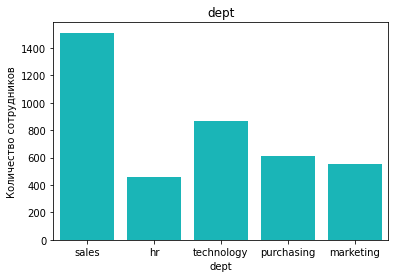

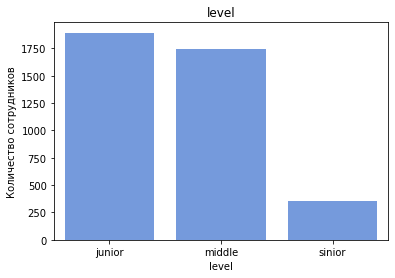

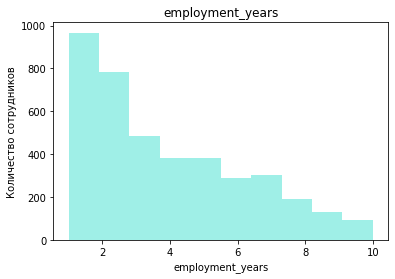

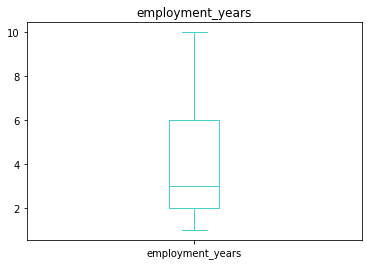

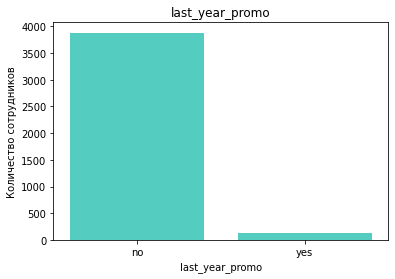

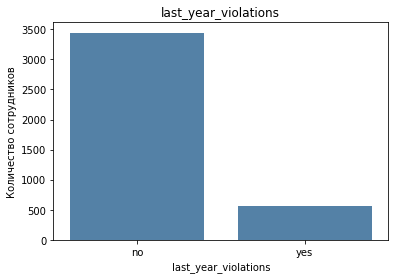

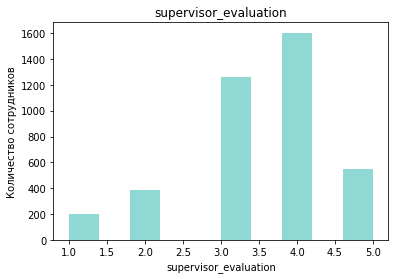

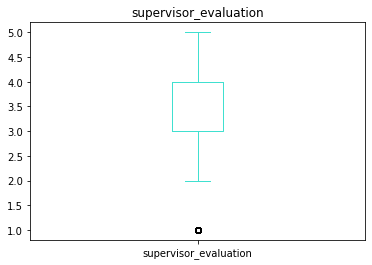

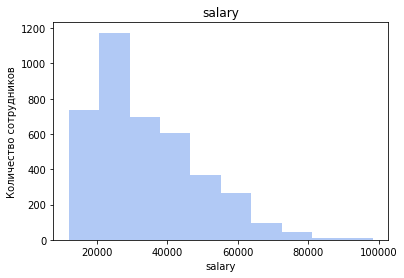

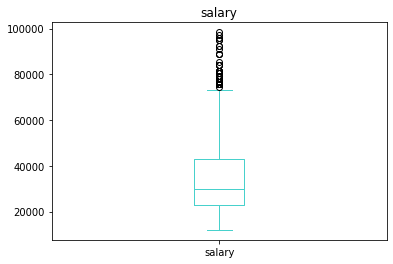

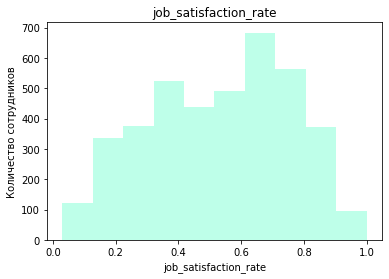

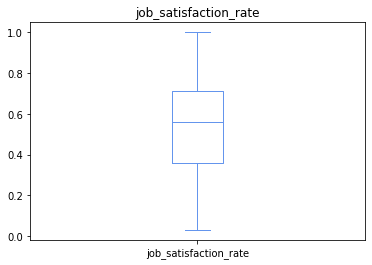

In [18]:
#применим их к каждому столбцу df
for el in train_job_sr.columns:
    if el in col:
        visual(train_job_sr, el)
    elif el in cat_col:
        visual_cat(train_job_sr, el)

In [19]:
# посмотрим на сотрудников с низкой оценкой руководителя
print(f"Количество сотрудников с оценкой 1 = \
{train_job_sr.query('supervisor_evaluation < 2')['supervisor_evaluation'].count()}")

print(f"Доля сотрудников с оценкой 1 = \
{round(train_job_sr.query('supervisor_evaluation < 2')['supervisor_evaluation'].count() / train_job_sr['supervisor_evaluation'].count(), 2):.2f}")

train_job_sr.query('supervisor_evaluation < 2').sample(10)

Количество сотрудников с оценкой 1 = 201
Доля сотрудников с оценкой 1 = 0.05


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
692386,sales,junior,high,2,no,no,1,30000,0.38
990103,purchasing,middle,medium,2,no,no,1,42000,0.33
301358,purchasing,junior,low,1,no,yes,1,18000,0.19
453651,purchasing,middle,low,6,no,yes,1,27600,0.28
134106,hr,middle,high,10,no,yes,1,57600,0.39
717452,marketing,junior,medium,3,no,no,1,26400,0.37
282083,sales,middle,high,4,yes,no,1,50400,0.34
343775,sales,junior,medium,4,no,yes,1,20400,0.16
893877,purchasing,middle,medium,5,no,yes,1,37200,0.10


In [20]:
# посмотрим на сотрудников с высоким окладом
print(f"Количество сотрудников с высоким окладом = \
{train_job_sr.query('salary > 70000')['salary'].count()}")

print(f"Доля сотрудников с высоким окладом = \
{round(train_job_sr.query('salary > 70000')['salary'].count() / train_job_sr['salary'].count(), 2):.2f}")

train_job_sr.query('salary > 70000').sample(10)

Количество сотрудников с высоким окладом = 85
Доля сотрудников с высоким окладом = 0.02


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
985583,technology,sinior,high,3,yes,no,4,79200,0.73
229741,sales,sinior,high,2,no,no,5,79200,0.66
590999,purchasing,sinior,high,10,no,yes,4,74400,0.74
176144,hr,sinior,high,3,no,no,1,72000,0.22
611498,sales,sinior,high,8,no,no,4,78000,0.86
335600,marketing,sinior,high,4,no,no,3,79200,0.31
681745,technology,sinior,high,5,no,yes,3,76800,0.03
147589,technology,sinior,high,2,no,no,1,75600,0.16
642094,technology,sinior,high,6,no,no,5,88800,0.83


interval columns not set, guessing: ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']


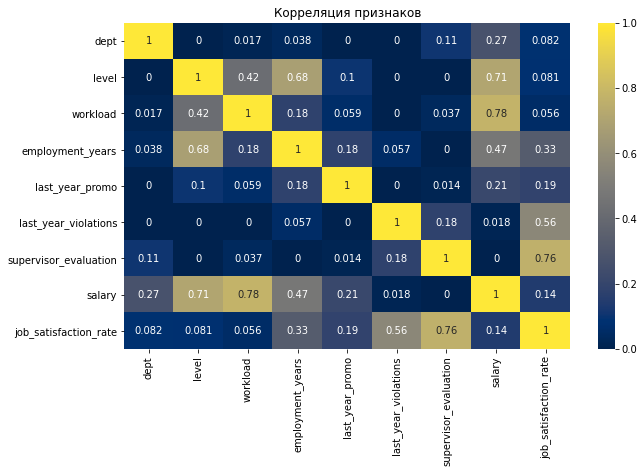

In [21]:
#посмотрим на коэффициенты корреляции между признаками
plt.figure(figsize=(10, 6))
sns.heatmap(train_job_sr.phik_matrix(), annot=True, cmap='cividis')
plt.title('Корреляция признаков');

Добавим разделение по целевому признаку на низкий и высокий уровень удовлетворенности. Исходя из пиков целевого признака, можно установить границу на 0,6. Посмотрим сначала для 0,5, определим границу после добавления информации об увольнения сотрудников.

interval columns not set, guessing: ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']


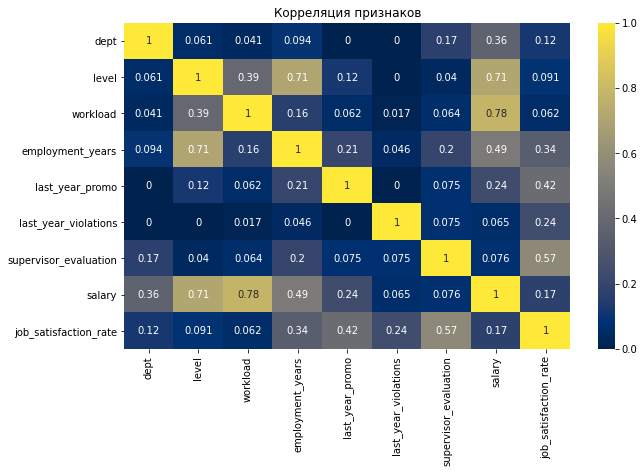

In [22]:
#посмотрим на коэффициенты корреляции между признаками
plt.figure(figsize=(10, 6))
sns.heatmap(train_job_sr[train_job_sr['job_satisfaction_rate'] > 0.5].phik_matrix(), annot=True, cmap='cividis')
plt.title('Корреляция признаков');

interval columns not set, guessing: ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']


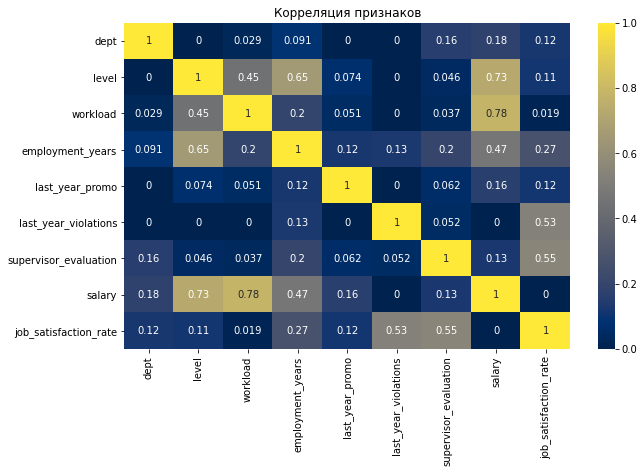

In [23]:
#посмотрим на коэффициенты корреляции между признаками
plt.figure(figsize=(10, 6))
sns.heatmap(train_job_sr[train_job_sr['job_satisfaction_rate'] <= 0.5].phik_matrix(), annot=True, cmap='cividis')
plt.title('Корреляция признаков');

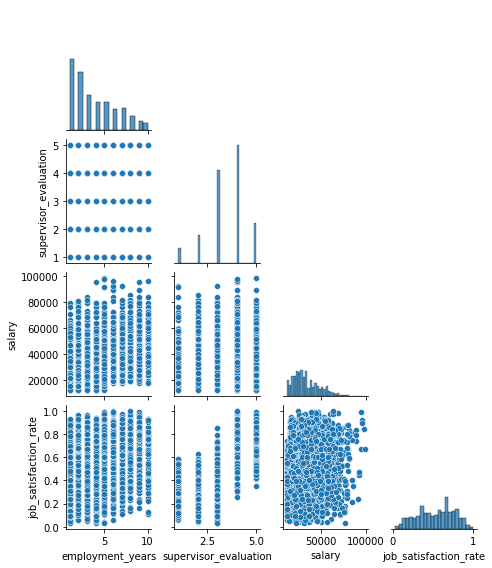

In [24]:
# построим диаграмму рассеяния 
sns.pairplot(
    data=train_job_sr, 
    aspect=.85,
    corner=True,
    height=2);

Выводы: 
1. Больше всего в компании продажников;
2. Логично распределены роли сотрудников: малышей и миддлов больше, чем сеньоров;
3. В компании действительно есть проблема с текучестью кадров: большинство сотрудников работают менее 2 лет;
4. Возможно, п.3 способствует крайне низкий % повышения сотрудников за год;
5. доля сотрудников с дисциплинарками выше, чем доля сотрудников с повышением;
6. руководители в среднем неплохо оценивают сотрудников, хотя есть сотрудники, оцененные в 1 - таких 5%;
7. оклад в среднем составляет 30 000, на графике видны выбросы. Предположительно, это ТОП-менеджмент: сильно загруженные сотрудники высокого уровня, таких всего 2%;
8. Целевой признак распределен с двумя пиками - около 0,4 и 0,7 соответственно.
9. присутствует явно выраженная корреляция между целевым признаком и оценкой руководителя;
10. Между собой сильно связаны пары признаков:
* зарплата и уровень сотрудника;
* зарплата и загруженность сотрудника;
* количество лет стажа и уровень сотрудника.

Любопытно, что в группе высокой удовлетворенности целевой признак имеет слабую связь с признаком "нарушал ли сотрудник ТД за последний год", в то время как в группе низкой удовлетворенности связь в два раза сильнее. Противоположная ситуация с признаком "юыло ли повышение за последний год" - слабая связь с целевым у низко удовлетворенных сотрудников, у группы высокой удовлетворенности - почти в 3 раза выше. 

### Подготовка данных

In [25]:
# посмотрим на долю низкой удовлетворенности, чтобы понять сбалансированность классов
train_job_sr[train_job_sr['job_satisfaction_rate'] <0.5]['dept'].count() / train_job_sr['dept'].count()

0.4248873309964947

In [26]:
# добавим признаки для улучшения качества моделей 
# решение пришло после нескольки первых итераций 
train_job_sr['employment_years_2'] = train_job_sr['employment_years'] ** 3
train_job_sr['supervisor_evaluation_2'] = train_job_sr['supervisor_evaluation'] ** 3
train_job_sr['salary_2'] = train_job_sr['salary'] ** 3

In [27]:
#  аналогичную операцию проведем с test_features
test_features['employment_years_2'] = test_features['employment_years'] ** 3
test_features['supervisor_evaluation_2'] = test_features['supervisor_evaluation'] ** 3
test_features['salary_2'] = test_features['salary'] ** 3

In [28]:
train_job_sr.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,employment_years_2,supervisor_evaluation_2,salary_2
id,,,,,,,,,,,,
155278,sales,junior,medium,2,no,no,1,24000,0.58,8,1,13824000000000
653870,hr,junior,high,2,no,no,5,38400,0.76,8,125,56623104000000
184592,sales,junior,low,1,no,no,2,12000,0.11,1,8,1728000000000
171431,technology,junior,low,4,no,no,2,18000,0.37,64,8,5832000000000
693419,hr,junior,medium,1,no,no,3,22800,0.20,1,27,11852352000000


In [29]:
# Проверяем тренировочную выборку на дубли
train_job_sr.duplicated().sum()

245

In [30]:
# Удаляем дубли
train_job_sr = train_job_sr.drop_duplicates()

In [31]:
# Проверяем тренировочную выборку на дубли
train_job_sr.duplicated().sum()

0

In [32]:
# разделим данные на выборки 
train_job_sr = train_job_sr.sort_values(by='id')
X_train = train_job_sr.drop(columns=['job_satisfaction_rate'])
X_test = test_features.sort_values(by='id')
y_train = train_job_sr['job_satisfaction_rate']
y_test = test_target_job_sr.sort_values(by='id')['job_satisfaction_rate']

In [33]:
# создаём списки с названиями признаков
ohe_columns = ['dept']
ord_columns = ['level', 'workload', 'last_year_violations', 'last_year_promo']
num_columns = ['salary', 'employment_years_2', 'supervisor_evaluation_2', 'salary_2', 'supervisor_evaluation', 'employment_years']

# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False))
    ]
    )

# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'],
                    ['low', 'medium', 'high'],
                    ['no', 'yes'],
                    ['no', 'yes']
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
])

In [34]:
#создаем функцию для оценки качества 
def smape(y_test, y_pred):
    metric = 100/len(y_test) *(np.sum(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred))))
    return metric

# создаём пользовательскую метрику
scorer = make_scorer(smape, greater_is_better=False) 

### Обучение моделей

Обучим две модели: линейную и дерево решений. Начнем с линейной 

In [35]:
param_grid2 = [
    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

grid = GridSearchCV(
    pipe_final, 
    param_grid2, 
    cv=5,
    random_state=RANDOM_STATE,
    scoring=scorer,
    n_jobs=-1
)
grid.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', grid.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', -grid.best_score_)

# проверьте работу модели на тестовой выборке
# рассчитайте прогноз на тестовых данных
y_test_pred = grid.predict(X_test)
print(f'Метрика smape на тестовой выборке: {smape(y_test, y_test_pred)}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['dept']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent')),
                    

Качество не удовлетворяет заданию. Посмотрим на дерево. 

In [36]:
param_grid = {
        'models__max_depth': distributions.IntDistribution(2, 11),
        'models__max_features': distributions.IntDistribution(2, 11),
        'models__min_samples_split': distributions.IntDistribution(2, 11),
        'models__min_samples_leaf': distributions.IntDistribution(1, 11)
}
    
oscv_all_add = OptunaSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    n_trials=25,
    scoring=scorer,
    random_state=RANDOM_STATE
) 

oscv_all_add.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', oscv_all_add.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', round(-oscv_all_add.best_score_, 2))

# проверьте работу модели на тестовой выборке
# рассчитайте прогноз на тестовых данных
y_test_pred = oscv_all_add.predict(X_test)
print(f'Метрика лучшей модели на тестовой выборке: {round(smape(y_test, y_test_pred), 2)}')

[I 2023-12-17 18:39:42,814] A new study created in memory with name: no-name-80b12dab-e4a1-4da0-a59b-7cc567333d45
[I 2023-12-17 18:39:43,035] Trial 0 finished with value: -24.506584057079348 and parameters: {'models__max_depth': 2, 'models__max_features': 7, 'models__min_samples_split': 2, 'models__min_samples_leaf': 8}. Best is trial 0 with value: -24.506584057079348.
[I 2023-12-17 18:39:43,164] Trial 1 finished with value: -22.960747602478346 and parameters: {'models__max_depth': 3, 'models__max_features': 5, 'models__min_samples_split': 4, 'models__min_samples_leaf': 11}. Best is trial 1 with value: -22.960747602478346.
[I 2023-12-17 18:39:43,293] Trial 2 finished with value: -23.97012424406767 and parameters: {'models__max_depth': 2, 'models__max_features': 11, 'models__min_samples_split': 2, 'models__min_samples_leaf': 3}. Best is trial 1 with value: -22.960747602478346.
[I 2023-12-17 18:39:43,425] Trial 3 finished with value: -19.861766278474395 and parameters: {'models__max_dept

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['dept']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent')),
                    

In [37]:

dummy = DummyRegressor()

dummy.fit(X_train, y_train)

print ('Метрика лучшей модели на тренировочной выборке:', dummy.score(X_train, y_train))

# проверьте работу модели на тестовой выборке
# рассчитайте прогноз на тестовых данных
y_test_pred_dummy = dummy.predict(X_test)
print(f'Метрика smape на тестовой выборке: {smape(y_test, y_test_pred_dummy)}')

Метрика лучшей модели на тренировочной выборке: 0.0
Метрика smape на тестовой выборке: 38.26225790202238


### Вывод по задаче 1

Наконец, лучшая модель, удовлетворяющая требованиям заказчика, найдена. 
Лучшая модель имеет параметры: DecisionTreeRegressor(max_depth=11, max_features=8, min_samples_leaf=5, min_samples_split=11).

Входные признаки в основном категориальные, поэтому логично, что линейная модель показала результат хуже. 

## Предсказание оттока сотрудников

### Загрузка данных

In [38]:
train_quit = pd.read_csv('https://code.s3.yandex.net/datasets/train_quit.csv')
test_features2 = pd.read_csv('https://code.s3.yandex.net/datasets/test_features.csv')
test_target_quit = pd.read_csv('https://code.s3.yandex.net/datasets/test_target_quit.csv')

### Предобработка данных

In [39]:
# сразу посмотрим на основную информацию train_quit (тестовые данные мы анализировали выше)
for el in train_quit.columns:
    data_info(train_quit, el)
print(train_quit.info())
print('Дублей: ', train_quit.duplicated().sum())
print(train_quit.isna().sum())

id
-------

size: 4000
na_count: 0
not_na_count: 4000
na_ratio: 0.00
duplicated: 0
duplicated_ratio: 0.00



dept
-------

size: 4000
na_count: 0
not_na_count: 4000
na_ratio: 0.00
duplicated: 3995
duplicated_ratio: 1.00



level
-------

size: 4000
na_count: 0
not_na_count: 4000
na_ratio: 0.00
duplicated: 3997
duplicated_ratio: 1.00



workload
-------

size: 4000
na_count: 0
not_na_count: 4000
na_ratio: 0.00
duplicated: 3997
duplicated_ratio: 1.00



employment_years
-------

size: 4000
na_count: 0
not_na_count: 4000
na_ratio: 0.00
duplicated: 3990
duplicated_ratio: 1.00



last_year_promo
-------

size: 4000
na_count: 0
not_na_count: 4000
na_ratio: 0.00
duplicated: 3998
duplicated_ratio: 1.00



last_year_violations
-------

size: 4000
na_count: 0
not_na_count: 4000
na_ratio: 0.00
duplicated: 3998
duplicated_ratio: 1.00



supervisor_evaluation
-------

size: 4000
na_count: 0
not_na_count: 4000
na_ratio: 0.00
duplicated: 3995
duplicated_ratio: 1.00



salary
-------

size: 4000
na_co

In [40]:
train_quit.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


In [41]:
test_features2.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


In [42]:
test_target_quit.head()

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


In [43]:
# переведем id в индексы в тренировочной и тестовой выборках
train_quit = train_quit.set_index('id')
test_features2 = test_features2.set_index('id')
test_target_quit = test_target_quit.set_index('id')

In [44]:
# посмотрим дубли в тренировочной выборке
train_quit.duplicated().sum()

1413

Ого. Что же, приется удалить полные дубли.

In [45]:
train_quit = train_quit.drop_duplicates()

In [46]:
train_quit.shape

(2587, 9)

In [47]:
# сначала соберем тестовую выборку 
df2 = test_features2.join(test_target_quit, on='id', how='left')

In [48]:
df2.shape

(2000, 9)

In [49]:
#заменим целевой признак на бинарный для удобства испольхования в моделях и расчете метрик качества. 
train_quit['quit'] = train_quit['quit'].replace({'yes': 1, 'no': 0})
df2['quit'] = df2['quit'].replace({'yes': 1, 'no': 0})

В данных отсутствуют пропуски. Для удобства дальнейшего использования данные были объединены в один датасет, целевой признак заменен на бинарный, где 1 - сотрудник уволился, 0 - нет. 

### Исследовательский анализ данных

#### Исследовательский анализ новых данных

Здесь использованы новые данные, поэтому посмотри на их распределение на графиках. 

In [50]:
train_quit.describe()

,employment_years,supervisor_evaluation,salary,quit
count,2587.00,2587.00,2587.00,2587.00
mean,4.21,3.37,37107.69,0.25
std,2.60,1.08,16267.35,0.43
min,1.00,1.00,12000.00,0.00
25%,2.00,3.00,24000.00,0.00
50%,4.00,3.00,33600.00,0.00
75%,6.00,4.00,46800.00,1.00
max,10.00,5.00,96000.00,1.00


In [51]:
#для начала определим количественные и категориальные столбцы 
col2 = ['employment_years',  'supervisor_evaluation', 'salary']
cat_col2 = ['dept', 'level', 'level', 'last_year_promo', 'last_year_violations', 'quit']

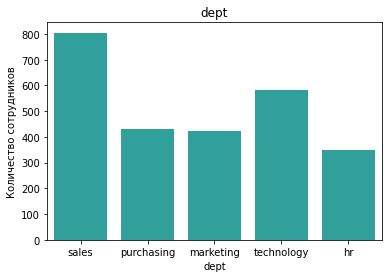

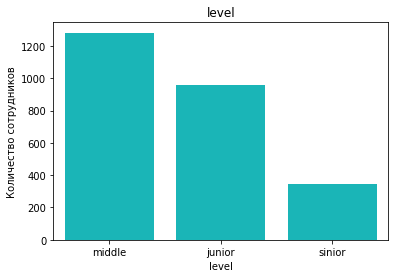

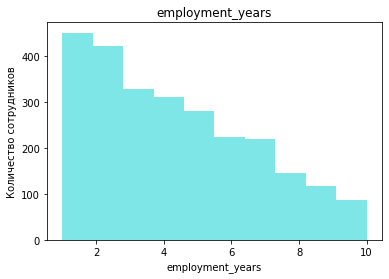

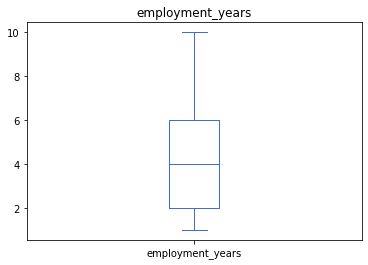

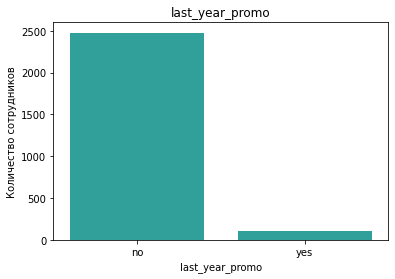

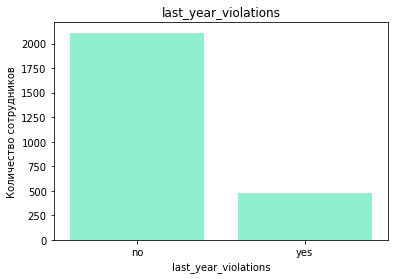

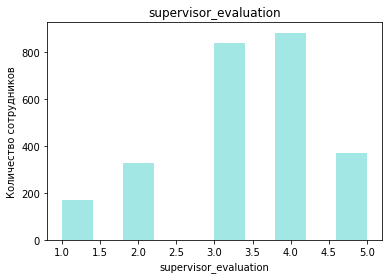

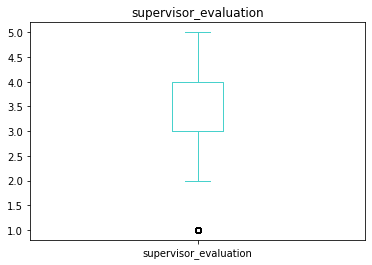

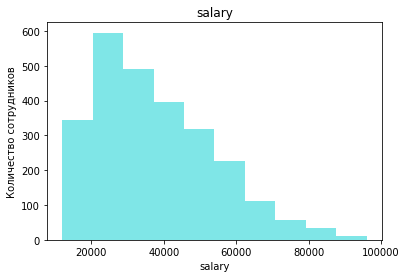

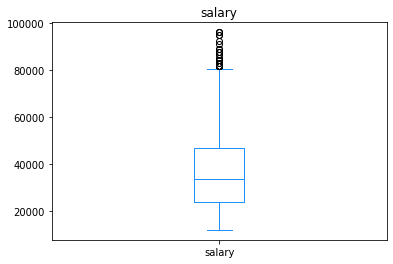

In [52]:
#применим их к каждому столбцу df2
for el in train_quit.columns:
    if el in col:
        visual(train_quit, el)
    elif el in cat_col:
        visual_cat(train_quit, el)

Снова в выбросах есть низкие оценки руководителя. Посмотрим на них 

In [53]:
# посмотрим на сотрудников с низкой оценкой руководителя
print(f"Количество сотрудников с оценкой 1 = \
{train_quit.query('supervisor_evaluation < 2')['supervisor_evaluation'].count()}")

print(f"Доля сотрудников с оценкой 1 = \
{round(train_quit.query('supervisor_evaluation < 2')['supervisor_evaluation'].count() / train_quit['supervisor_evaluation'].count(), 2):.2f}")

train_quit.query('supervisor_evaluation < 2').sample(5)

Количество сотрудников с оценкой 1 = 171
Доля сотрудников с оценкой 1 = 0.07


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
id,,,,,,,,,
765879,purchasing,junior,low,1,no,yes,1,18000,1
908334,sales,junior,medium,3,no,no,1,20400,1
622144,marketing,sinior,high,10,no,no,1,73200,0
797819,hr,middle,high,6,no,no,1,48000,0
134470,technology,middle,high,4,no,no,1,55200,0


interval columns not set, guessing: ['employment_years', 'supervisor_evaluation', 'salary', 'quit']


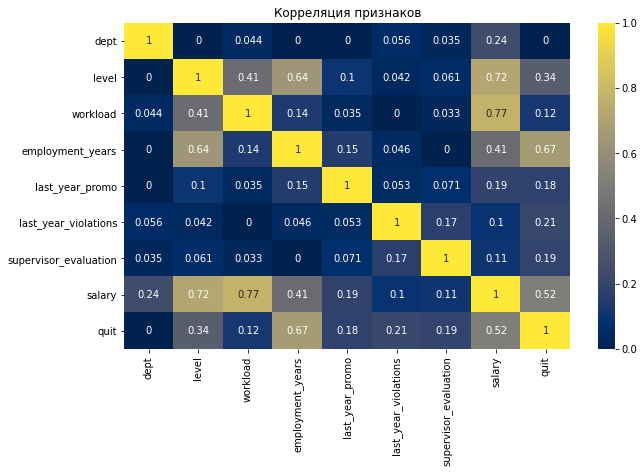

In [54]:
#посмотрим на коэффициенты корреляции между признаками
plt.figure(figsize=(10, 6))
sns.heatmap(train_quit.phik_matrix(), annot=True, cmap='cividis')
plt.title('Корреляция признаков');

interval columns not set, guessing: ['employment_years', 'supervisor_evaluation', 'salary', 'quit']


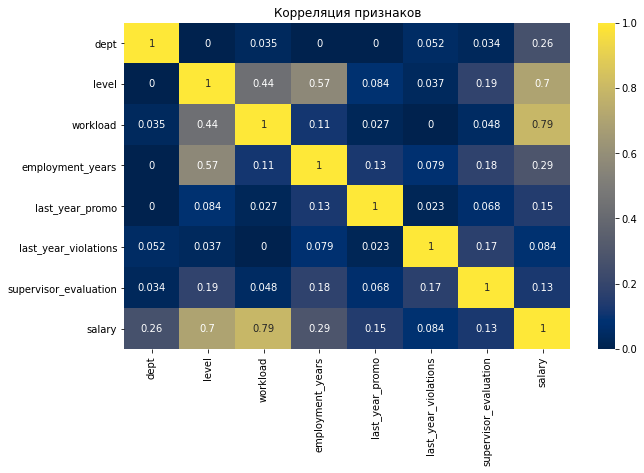

In [55]:
#посмотрим на коэффициенты корреляции между признаками
plt.figure(figsize=(10, 6))
sns.heatmap(train_quit[train_quit['quit'] == 0].phik_matrix(), annot=True, cmap='cividis')
plt.title('Корреляция признаков');

interval columns not set, guessing: ['employment_years', 'supervisor_evaluation', 'salary', 'quit']


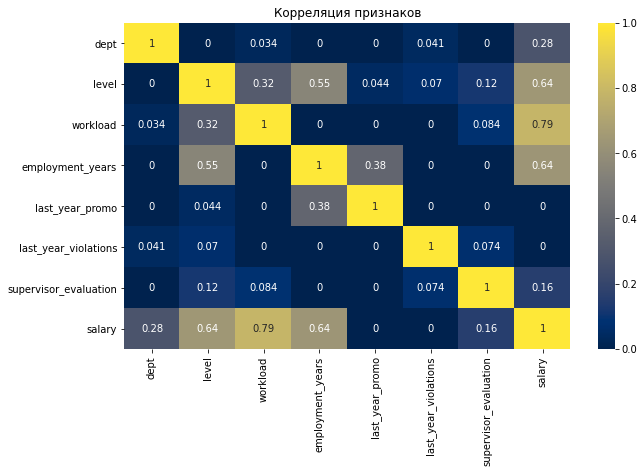

In [56]:
#посмотрим на коэффициенты корреляции между признаками
plt.figure(figsize=(10, 6))
sns.heatmap(train_quit[train_quit['quit'] == 1].phik_matrix(), annot=True, cmap='cividis')
plt.title('Корреляция признаков');

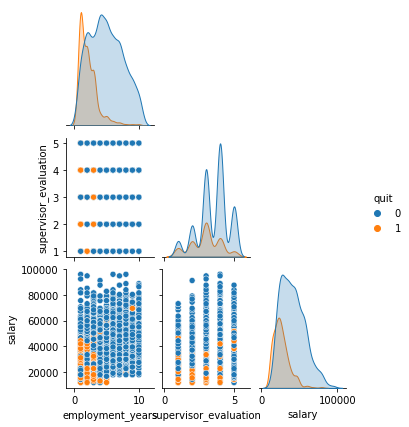

In [57]:
# построим диаграмму рассеяния 
sns.pairplot(
    data=train_quit, 
    aspect=.85,
    corner=True,
    hue='quit',
    height=2);

Выводы:
1. Данные по компании не поменяли свой состав, но изменили содержание - это новые данные с теми е столбцами, за исключением целевого признака. Это понадобится нам дальше при предсказании уровня удовлетворенности сотрудника. 
2. В данных по-прежнему отсутствуют выбросы. Здесь также встречаются сотрудники, оцененные руководителем на 1, но это не выброс, а оценка руководителя на 1 (встречается редко, всего в 5% случаев). 
3. По-прежнему связаны между собой зарплата и стаж, зарплата и загруженность, что, в общем, логично. 
4. Увольнение связано с признаками стаж и зарплата. 
5. В данных нет информации об уволенных сотрудниках с большим стажем. Если проблема в сборе данных, это может отрицательно сказаться на модели - возможно, она будет предсказывать отсутствие увольнения для сотрудников сбольшим стажем всегда. 

Интересно, что у уволившихся сотрудников связь между зарплвтной и загруженностью больше, чем у оставшихся сотрудников. 

#### Портрет уволившегося сотрудника 

Анализ будем проводить на train_quit

In [58]:
# посмотрим на статистику в обеих категориях
# начнем с уволившихся
train_quit[train_quit['quit'] == 1].describe()

,employment_years,supervisor_evaluation,salary,quit
count,655.00,655.00,655.00,655.00
mean,2.16,2.96,25767.94,1.00
std,1.50,1.05,10484.83,0.00
min,1.00,1.00,12000.00,1.00
25%,1.00,2.00,18000.00,1.00
50%,2.00,3.00,24000.00,1.00
75%,3.00,4.00,30600.00,1.00
max,10.00,5.00,79200.00,1.00


In [59]:
# теперь посмотрим на данные по оставшимся в компании сотрудникам 
train_quit[train_quit['quit'] == 0].describe()

,employment_years,supervisor_evaluation,salary,quit
count,1932.00,1932.00,1932.00,1932.00
mean,4.91,3.51,40952.17,0.00
std,2.53,1.06,16085.74,0.00
min,1.00,1.00,12000.00,0.00
25%,3.00,3.00,27600.00,0.00
50%,5.00,4.00,39000.00,0.00
75%,7.00,4.00,51600.00,0.00
max,10.00,5.00,96000.00,0.00


Ожидаемо, у уволившихся все показатели хуже: ниже средняя зарплата, ниже оценка руководителя.
75% сотрудников уволбняются максимум с двухлетним стажем - похоже на закономерность, потому что все же есть уволенные сотрудники со стажем 10 лет.  

Посмотрим на их категориальыне признаки

Посмотрим на графиках

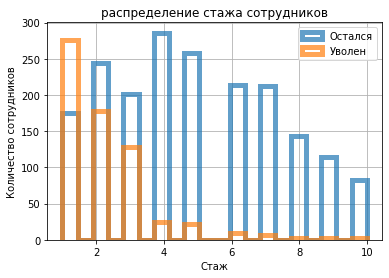

In [60]:
ax = train_quit.loc[train_quit['quit'] == 0].plot(
    kind='hist',
    y='employment_years',
    histtype='step',
    bins=20,
    linewidth=5,
    alpha=0.7,
    label='Остался',
)
train_quit.loc[train_quit['quit'] == 1].plot(
    kind='hist',
    y='employment_years',
    histtype='step',
    bins=20,
    linewidth=5,
    alpha=0.7,
    label='Уволен',
    ax=ax,
    grid=True,
    legend=True,
)
plt.ylabel('Количество сотрудников')
plt.xlabel('Стаж')
plt.title('распределение стажа сотрудников');

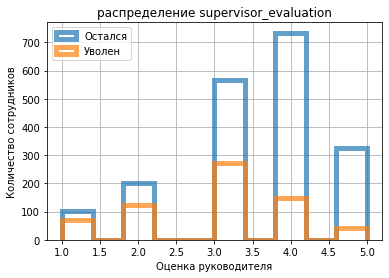

In [61]:
ax = train_quit.loc[train_quit['quit'] == 0].plot(
    kind='hist',
    y='supervisor_evaluation',
    histtype='step',
    linewidth=5,
    alpha=0.7,
    label='Остался',
)
train_quit.loc[train_quit['quit'] == 1].plot(
    kind='hist',
    y='supervisor_evaluation',
    histtype='step',
    linewidth=5,
    alpha=0.7,
    label='Уволен',
    ax=ax,
    grid=True,
    legend=True,
)
plt.ylabel('Количество сотрудников')
plt.xlabel('Оценка руководителя')
plt.title('распределение supervisor_evaluation')
plt.legend(loc="upper left");

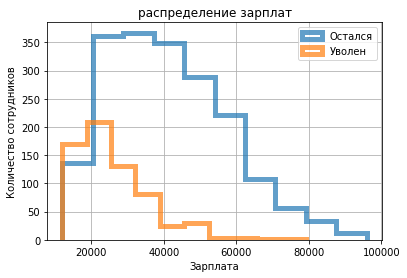

In [62]:
ax = train_quit.loc[train_quit['quit'] == 0].plot(
    kind='hist',
    y='salary',
    histtype='step',
    linewidth=5,
    alpha=0.7,
    label='Остался',
)
train_quit.loc[train_quit['quit'] == 1].plot(
    kind='hist',
    y='salary',
    histtype='step',
    linewidth=5,
    alpha=0.7,
    label='Уволен',
    ax=ax,
    grid=True,
    legend=True,
)
plt.ylabel('Количество сотрудников')
plt.xlabel('Зарплата')
plt.title('распределение зарплат');

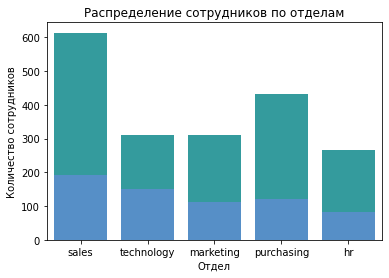

In [63]:
ax = sns.countplot(x='dept', data=train_quit.loc[train_quit['quit'] == 0], 
                   color=np.random.choice(colors), saturation=0.5, linewidth=0.4)
sns.countplot(x='dept', data=train_quit.loc[train_quit['quit'] == 1], 
              color=np.random.choice(colors), saturation=0.5, linewidth=0.4)
plt.ylabel('Количество сотрудников')
plt.xlabel('Отдел')
plt.title('Распределение сотрудников по отделам');

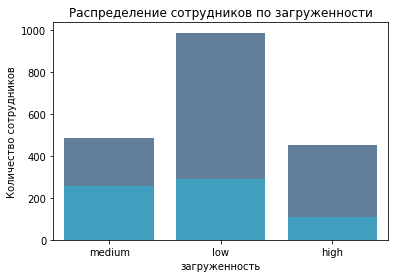

In [64]:
ax = sns.countplot(x='workload', data=train_quit.loc[train_quit['quit'] == 0], 
                   color=np.random.choice(colors), saturation=0.5, linewidth=0.4)
sns.countplot(x='workload', data=train_quit.loc[train_quit['quit'] == 1], 
              color=np.random.choice(colors), saturation=0.5, linewidth=0.4)
plt.ylabel('Количество сотрудников')
plt.xlabel('загруженность')
plt.title('Распределение сотрудников по загруженности');

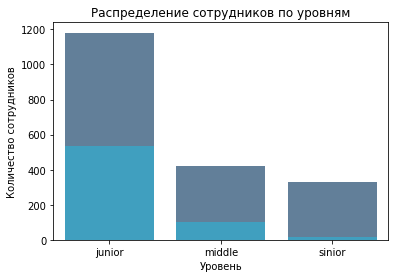

In [65]:
ax = sns.countplot(x='level', data=train_quit.loc[train_quit['quit'] == 0], 
                   color=np.random.choice(colors), saturation=0.5, linewidth=0.4)
sns.countplot(x='level', data=train_quit.loc[train_quit['quit'] == 1], 
              color=np.random.choice(colors), saturation=0.5, linewidth=0.4)
plt.ylabel('Количество сотрудников')
plt.xlabel('Уровень')
plt.title('Распределение сотрудников по уровням');

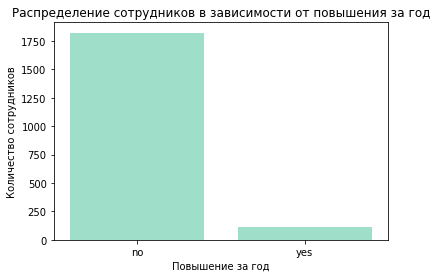

In [66]:
ax = sns.countplot(x='last_year_promo', data=train_quit.loc[train_quit['quit'] == 0], 
                   color=np.random.choice(colors), saturation=0.5, linewidth=0.4)
sns.countplot(x='last_year_promo', data=train_quit.loc[train_quit['quit'] == 1], 
              color=np.random.choice(colors), saturation=0.5, linewidth=0.4)
plt.ylabel('Количество сотрудников')
plt.xlabel('Повышение за год')
plt.title("Распределение сотрудников в зависимости от повышения за год");

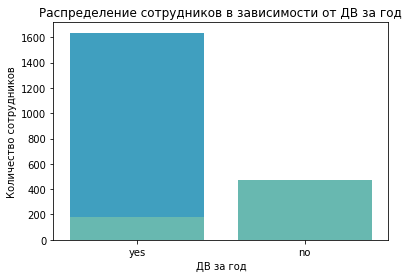

In [67]:
ax = sns.countplot(x='last_year_violations', data=train_quit.loc[train_quit['quit'] == 0], 
                   color=np.random.choice(colors), saturation=0.5, linewidth=0.4)
sns.countplot(x='last_year_violations', data=train_quit.loc[train_quit['quit'] == 1], 
              color=np.random.choice(colors), saturation=0.5, linewidth=0.4)
plt.ylabel('Количество сотрудников')
plt.xlabel('ДВ за год')
plt.title("Распределение сотрудников в зависимости от ДВ за год");

In [68]:
train_quit.loc[train_quit['quit'] == 1].pivot_table(index=('dept', 'level', 'workload'), aggfunc={'median', 'count'})

employment_years         quit        salary         \
                                      count median count median  count median   
dept       level  workload                                                      
hr         junior high                 5.00   1.00     5      1      5  38400   
                  low                 32.00   2.00    32      1     32  15600   
                  medium              31.00   1.00    31      1     31  25200   
           middle high                 1.00   4.00     1      1      1  62400   
                  low                 12.00   2.50    12      1     12  24000   
           sinior medium               1.00   2.00     1      1      1  60000   
marketing  junior high                17.00   2.00    17      1     17  36000   
                  low                 37.00   1.00    37      1     37  16800   
                  medium              43.00   2.00    43      1     43  26400   
           middle high                 2.00   3.00     2      1      2  57000   
                  low                  9.00   3.00     9      1      9  24000   
                  medium               3.00   5.00     3      1      3  46800   
           sinior low                  1.00   3.00     1      1      1  26400   
purchasing junior high                17.00   1.00    17      1     17  34800   
                  low                 39.00   2.00    39      1     39  15600   
                  medium              41.00   1.00    41      1     41  24000   
           middle high                 4.00   2.50     4      1      4  48000   
                  low                  7.00   3.00     7      1      7  22800   
                  medium               6.00   4.50     6      1      6  43200   
           sinior low                  4.00   1.50     4      1      4  28800   
                  medium               2.00   5.00     2      1      2  52800   
sales      junior high                25.00   2.00    25      1     25  32400   
                  low                 62.00   2.00    62      1     62  14400   
                  medium              67.00   2.00    67      1     67  24000   
           middle high                13.00   3.00    13      1     13  48000   
                  low                 16.00   3.00    16      1     16  22800   
                  medium               4.00   1.50     4      1      4  38400   
           sinior high                 1.00   3.00     1      1      1  66000   
                  low                  2.00   6.50     2      1      2  31800   
                  medium               1.00   6.00     1      1      1  46800   
technology junior high                22.00   1.50    22      1     22  42000   
                  low                 51.00   1.00    51      1     51  19200   
                  medium              48.00   1.50    48      1     48  30000   
           middle low                 17.00   2.00    17      1     17  27600   
                  medium               7.00   6.00     7      1      7  45600   
           sinior high                 2.00   7.50     2      1      2  79200   
                  low                  2.00   4.00     2      1      2  38400   
                  medium               1.00   9.00     1      1      1  69600   

                           supervisor_evaluation         
                                           count median  
dept       level  workload                               
hr         junior high                      5.00   4.00  
                  low                      32.00   3.00  
                  medium                   31.00   3.00  
           middle high                      1.00   4.00  
                  low                      12.00   3.00  
           sinior medium                    1.00   3.00  
marketing  junior high                     17.00   3.00  
                  low                      37.00   3.00  
                  medium                   43.00   3.00  
         

In [69]:
# определим столбцы, для которых можем использовать value_counts
col_to_portret = ['dept', 'level', 'workload', 'last_year_promo', 
                  'last_year_violations', 'employment_years',  'supervisor_evaluation']

In [70]:
# в цикле посмотрим на распределение увольняшек по категориям

for el in train_quit.columns:
    if el in col_to_portret:
        print(el)
        print(train_quit.query('quit == 1')[el].value_counts(normalize=True))
        print("-------\n")

dept
sales        0.29
technology   0.23
purchasing   0.18
marketing    0.17
hr           0.13
Name: dept, dtype: float64
-------

level
junior   0.82
middle   0.15
sinior   0.03
Name: level, dtype: float64
-------

workload
low      0.44
medium   0.39
high     0.17
Name: workload, dtype: float64
-------

employment_years
1    0.42
2    0.27
3    0.20
4    0.04
5    0.03
6    0.02
7    0.01
8    0.00
9    0.00
10   0.00
Name: employment_years, dtype: float64
-------

last_year_promo
no    1.00
yes   0.00
Name: last_year_promo, dtype: float64
-------

last_year_violations
no    0.73
yes   0.27
Name: last_year_violations, dtype: float64
-------

supervisor_evaluation
3   0.42
4   0.23
2   0.19
1   0.11
5   0.07
Name: supervisor_evaluation, dtype: float64
-------



<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b> 	

Исправление принимается!
</div>

In [71]:
#среднчч зп уволенных сотрудников
train_quit.query('quit == 1')['salary'].median()

24000.0

Вывод:
1. Чаще всего увольняются сотрудники с параметрами:
* стаж - 1 год;
* оценка руководителя - 3;
* оклад - 22800;
* низкая или средняя загруженность;
* уровень - junior или middle;
* продажи. 

По отделам:
1. hr:
* junior
* низкая или средняя загруженность;
* оценка руководителя: 3
* оклад: до 26 000 

2. marketing:
* junior
* низкая или средняя загруженность;
* оценка руководителя: 3
* оклад: до 27 000 

3. purchasing:
* junior
* низкая или средняя загруженность;
* оценка руководителя: 3
* оклад: до 24 000 включительно

4. sales:
* junior
* низкая или средняя загруженность;
* оценка руководителя: 3
* оклад: до 24 000 включительно

4. technology:
* junior
* низкая или средняя загруженность;
* оценка руководителя: 3
* оклад: до 30 000 включительно.

#### Влияние удовлетворенности на увольнение

Проверять утверждение о влиянии удовлетворенности сотрудника на увольнение будем на тестовой выборке. Для начала добавим туда целевой признак с помощью модели. Поскольку мы облегчали себе исследование, объединив данные в первой задаче, сейчас нам потребуется добавить признаки, ипользуемые в первой модели и сделать предсказание еще раз. 

In [72]:
# добавляем признаки
df2['employment_years_2'] = df2['employment_years'] ** 3
df2['supervisor_evaluation_2'] = df2['supervisor_evaluation'] ** 3
df2['salary_2'] = df2['salary'] ** 3


In [73]:
# предсказываем удовлетворенность сотрудников
pred_jsr = oscv_all_add.predict(df2)

In [74]:
# добавляем предсказание
df2['pred_jsr'] = pred_jsr

In [75]:
#заменим целевой признак на бинарный для удобства испольхования в моделях и расчете метрик качества. 
df2['quit'] = df2['quit'].replace({'yes': 1, 'no': 0})

#заодно и для тренировочной, это нам дальше понадобится 
train_quit['quit'] = train_quit['quit'].replace({'yes': 1, 'no': 0})

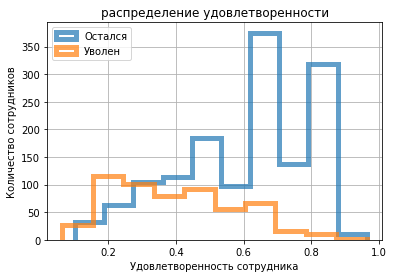

In [76]:
ax = df2.loc[df2['quit'] == 0].plot(
    kind='hist',
    y='pred_jsr',
    histtype='step',
    linewidth=5,
    alpha=0.7,
    label='Остался',
)
df2.loc[df2['quit'] == 1].plot(
    kind='hist',
    y='pred_jsr',
    histtype='step',
    linewidth=5,
    alpha=0.7,
    label='Уволен',
    ax=ax,
    grid=True,
    legend=True,
)
plt.ylabel('Количество сотрудников')
plt.xlabel('Удовлетворенность сотрудника')
plt.title('распределение удовлетворенности')
plt.legend(loc="upper left");

interval columns not set, guessing: ['employment_years', 'supervisor_evaluation', 'salary', 'quit', 'employment_years_2', 'supervisor_evaluation_2', 'salary_2', 'pred_jsr']


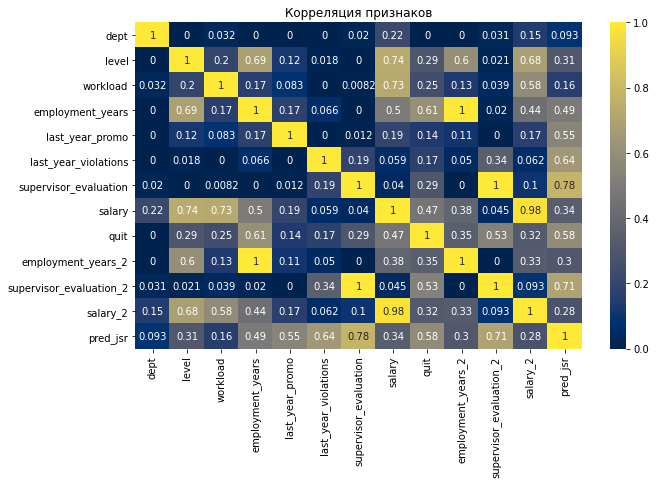

In [77]:
#посмотрим на коэффициенты корреляции между признаками
plt.figure(figsize=(10, 6))
sns.heatmap(df2.phik_matrix(), annot=True, cmap='cividis')
plt.title('Корреляция признаков');

Вывод: действительно, чем выше удовлетворенность, тем ниже вероятность оттока сотрудников. 

### Добавление нового входного признака

Помним о том, что в первой модели использу.ься дополнительно рассчитанные столюцы. Для испольхования уровня удовлетворенности в модели оттока нам понадобится преобразовать данные таким же способом - добавить столбцы, затем сделать предсказание. Только потом можно будет делить данные. 

In [78]:
# добавляем признаки
train_quit['employment_years_2'] = train_quit['employment_years'] ** 3
train_quit['supervisor_evaluation_2'] = train_quit['supervisor_evaluation'] ** 3
train_quit['salary_2'] = train_quit['salary'] ** 3

In [79]:
# предсказываем удовлетворенность сотрудников
pred_jsr2 = oscv_all_add.predict(train_quit)

In [80]:
# добавляем предсказание
train_quit['jsr'] = pred_jsr2

### Подготовка данных

In [81]:
# разделим данные на выборки 
train_quit = train_quit.sort_values(by='id')
X_train2 = train_quit.drop(columns=['quit'], axis=1)
X_test2 = df2.sort_values(by='id').drop(columns=['quit'], axis=1)
y_train2 = train_quit['quit']
y_test2 = df2.sort_values(by='id')['quit']

In [82]:
train_quit.duplicated().sum()

0

In [83]:
X_test2.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,employment_years_2,supervisor_evaluation_2,salary_2,pred_jsr
id,,,,,,,,,,,,
100298,hr,junior,low,2,no,no,4,19200,8,64,7077888000000,0.83
100480,marketing,junior,low,4,no,no,4,16800,64,64,4741632000000,0.83
100503,purchasing,middle,high,5,no,no,4,55200,125,64,168196608000000,0.80
100610,sales,middle,medium,5,no,no,4,43200,125,64,80621568000000,0.83
100692,sales,middle,high,6,no,no,4,48000,216,64,110592000000000,0.67


In [84]:
X_test2 = X_test2.rename(columns={"pred_jsr": "jsr"})

In [85]:
# создаём списки с названиями признаков
ohe_columns2 = ['dept']
ord_columns2 = ['level', 'workload', 'last_year_violations', 'last_year_promo']
num_columns2 = ['salary', 'employment_years_2', 'supervisor_evaluation_2', 
                'salary_2', 'supervisor_evaluation', 'employment_years', 'jsr']

# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe2 = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False))
    ]
    )

# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe2 = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'],
                    ['low', 'medium', 'high'],
                    ['no', 'yes'],
                    ['no', 'yes']
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

# создаём общий пайплайн для подготовки данных
data_preprocessor2 = ColumnTransformer(
    [('ohe', ohe_pipe2, ohe_columns2),
     ('ord', ord_pipe2, ord_columns2),
     ('num', MinMaxScaler(), num_columns2)
    ], 
    remainder='passthrough'
)

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final2 = Pipeline([
    ('preprocessor', data_preprocessor2),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

### Обучение модели

Переберем варианты моделей. Возьмем 4: DecisionTreeClassifier, KNeighborsClassifier, LogisticRegression, SVC.

In [86]:
param_grid2 = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        "models__max_depth": range(2, 5),
        "models__max_features": range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE)],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

randomized_search2 = RandomizedSearchCV(
    pipe_final2, 
    param_grid2, 
    cv=10,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search2.fit(X_train2, y_train2)

print('Лучшая модель и её параметры:\n\n', randomized_search2.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search2.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['dept']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent')),
                    

Неплохо, но качество не подходит. Попробуем добавить регуляризацию в SVC и сравнить с другими моделями

In [87]:
param_grid3 = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        "models__max_depth": range(2, 5),
        "models__max_features": range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE)],
        'models__C': range(0, 10),
        'models__kernel': ['rbf','sigmoid', 'linear', 'poly'],
        'models__gamma': range(0, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

randomized_search2 = RandomizedSearchCV(
    pipe_final2, 
    param_grid2, 
    cv=10,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search2.fit(X_train2, y_train2)

print('Лучшая модель и её параметры:\n\n', randomized_search2.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search2.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['dept']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent')),
                    

Метрика не меняется. В первой задаче нам помог оптимизированный поиск для деревьев, и большее количество параметров. попробуем повторить 

In [88]:
param_grid5 = {
        'models__max_depth': distributions.IntDistribution(2, 11),
        'models__max_features': distributions.IntDistribution(2, 11),
        'models__min_samples_split': distributions.IntDistribution(2, 11),
        'models__min_samples_leaf': distributions.IntDistribution(1, 11)
}
    
oscv_all_add2 = OptunaSearchCV(
    pipe_final2, 
    param_grid5, 
    cv=5,
    n_trials=25,
    scoring='roc_auc',
    random_state=RANDOM_STATE
) 

oscv_all_add2.fit(X_train2, y_train2)

print('Лучшая модель и её параметры:\n\n', oscv_all_add2.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', oscv_all_add2.best_score_)

[I 2023-12-17 18:40:05,595] A new study created in memory with name: no-name-c4d907ce-f976-4737-a437-393ad887dc2c
[I 2023-12-17 18:40:05,731] Trial 0 finished with value: 0.845732453331134 and parameters: {'models__max_depth': 2, 'models__max_features': 7, 'models__min_samples_split': 2, 'models__min_samples_leaf': 8}. Best is trial 0 with value: 0.845732453331134.
[I 2023-12-17 18:40:05,859] Trial 1 finished with value: 0.8729937265196733 and parameters: {'models__max_depth': 3, 'models__max_features': 5, 'models__min_samples_split': 4, 'models__min_samples_leaf': 11}. Best is trial 1 with value: 0.8729937265196733.
[I 2023-12-17 18:40:05,988] Trial 2 finished with value: 0.8440379401301301 and parameters: {'models__max_depth': 2, 'models__max_features': 11, 'models__min_samples_split': 2, 'models__min_samples_leaf': 3}. Best is trial 1 with value: 0.8729937265196733.
[I 2023-12-17 18:40:06,125] Trial 3 finished with value: 0.88590018356545 and parameters: {'models__max_depth': 6, 'mo

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['dept']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent')),
                    

In [89]:
# рассчитайте прогноз на тестовых данных
y_test_pred5 = oscv_all_add2.predict_proba(X_test2)[:,1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test2, y_test_pred5)}')

Метрика ROC-AUC на тестовой выборке: 0.914961526304352


### Выводы

При увеличении вариантов параметров для дерева решений оно стало лучшей моделью, справившись с тестовой выборкой лучше метода опорных векторов. Классы все же перемешаны сильнее, чем хотелось бы, поэтому дерево справилось лучше. 
Логичстическая, ожидаемо, тоже не вышла в лидеры - данные одинаковы с первым заданием и категориальных параметров сильно больше. 

## Общий вывод

Цели проекта состояли в том, чтобы:
1. разработать решение, которое позволит предсказать уровень удовлетворённости сотрудника; 
2. построить модель прогноза оттока сотрудника.

<b>Прогнозирование удовлетворенности сотрудников:</b> 

В отделе и уровне сотрудников найдены пропуски как в тренировочной, так и в тестовой выборках.

При исследовательском анализе выявлено: 
1. Больше всего в компании продажников;
2. Логично распределены роли сотрудников: малышей и миддлов больше, чем сеньоров;
3. В компании действительно есть проблема с текучестью кадров: большинство сотрудников работают менее 2 лет;
4. Возможно, п.3 способствует крайне низкий % повышения сотрудников за год;
5. доля сотрудников с дисциплинарками выше, чем доля сотрудников с повышением;
6. руководители в среднем неплохо оценивают сотрудников, хотя есть сотрудники, оцененные в 1 - таких 5%;
7. оклад в среднем составляет 30 000, на графике видны выбросы. Предположительно, это ТОП-менеджмент: сильно загруженные сотрудники высокого уровня, таких всего 2%;
8. Целевой признак распределен с двумя пиками - около 0,4 и 0,7 соответственно.
9. присутствует явно выраженная корреляция между целевым признаком и оценкой руководителя;
10. Между собой сильно связаны пары признаков:
* зарплата и уровень сотрудника;
* зарплата и загруженность сотрудника;
* количество лет стажа и уровень сотрудника.

Лучшей моделью для прогноза удовлетворенности выбрано дерево решений с параментрами: 
* max_depth=11, 
* max_features=8, 
* min_samples_leaf=5, 
* min_samples_split=11.

Модель показаа лучшее качество на выбранной метрике SMAPE. 

<b>Модель прогноза оттока сотрудника:</b> 

1. Данные по компании не поменяли свой состав, но изменили содержание - это новые данные с теми же столбцами, за исключением целевого признака. 
2. В данных отсутствуют выбросы. Здесь также встречаются сотрудники, оцененные руководителем на 1, но это не выброс, а оценка руководителя на 1 (встречается редко, всего в 5% случаев). 
3. По-прежнему связаны между собой зарплата и стаж, зарплата и загруженность, что, в общем, логично. 
4. Увольнение связано с признаками стаж и зарплата. 

Чаще всего увольняются сотрудники с параметрами:
* стаж - 1 год;
* оценка руководителя - 3;
* оклад - 22800;
* низкая или средняя загруженность;
* уровень - junior или middle;
* продажи. 

Увольнение действительно связано с удовлетворенность: коэффициент корреляции межд признаками составляет -0.45, т.е. чем выше удовлетворенность, тем меньше вероятность оттока. 

Из 4 моделей для прогноза оттока (DecisionTreeClassifier, KNeighborsClassifier, LogisticRegression, SVC) лучшей вновь оказалось дерево решений, хотя SVC тоде показывал неплохое качество, но на тестовой выборке уступает дереву с параметрами:
* max_depth=7, 
* max_features=11,
* min_samples_leaf=6, 
* min_samples_split=9/

При желании можем проанализировать веса признаков и еще немного поднять качество. На данный момент модель отвечает запросу. 


<b>Предложения для бизнеса:</b> 
1. Ввести единую систему поощрений для увеличения количества повышений. Сейчас повышений значительно меньше, чем дисциплинарных взысканий, это влияет на удовлетворенность сотрудников и, как следствие, на отток. 
2. Закрепить наставников за малышами: чаще всего увольняются сотрудники с небольшим стажем. Возмонжо, стоит проанализировать действующую систему обучения новичков и поменять подход к наставничеству;
3. Ввести дисконт для новичков на период адаптации, особенно актуально для отдела продаж, т.к. именно там отток больше всего. 